In [2]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KernelKMeans

import collections


In [4]:
plt.style.use('fivethirtyeight')
np.random.seed(0)

In [25]:
industry= pd.read_excel('업종별 매출 실적.xlsx')
industry['시점'] = industry['시점'].astype('str').apply(lambda x: x[:4]+'-'+x[5:8])
industry['시점']=pd.to_datetime(industry['시점'])

In [27]:
types=list(industry.columns)[1:]

Text(0.5, 1.0, '추이')

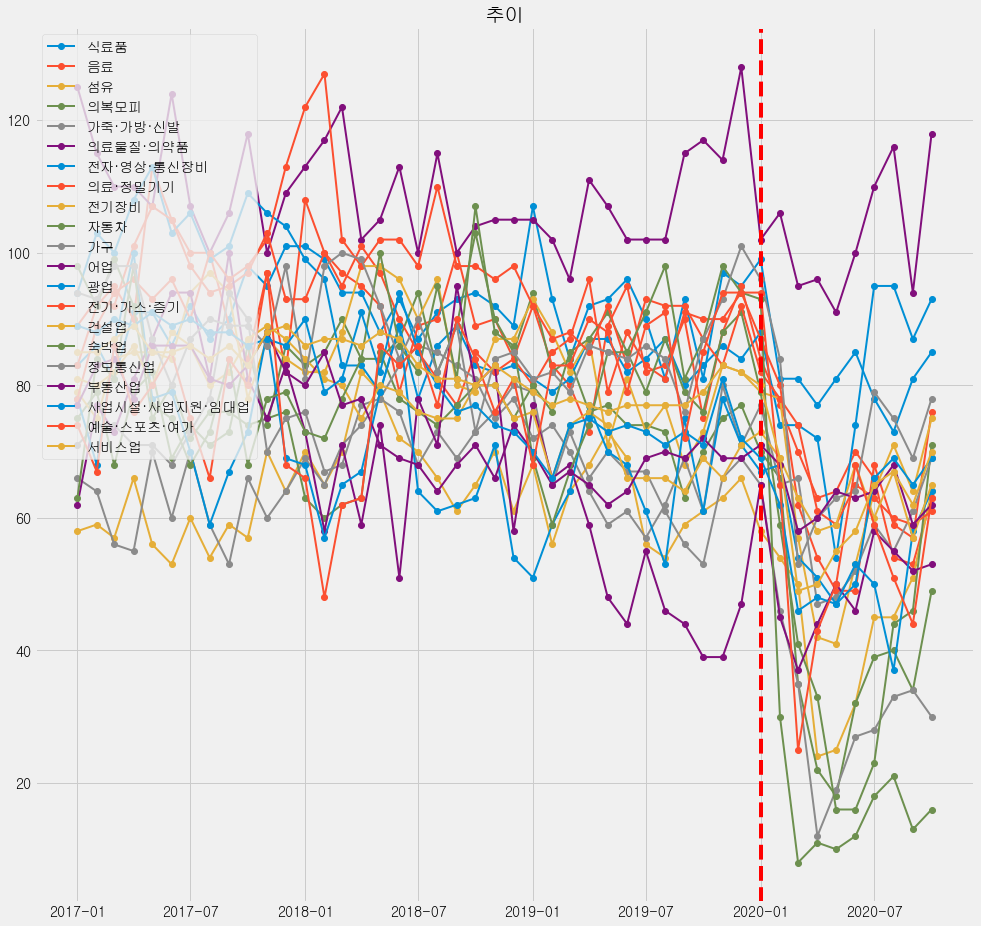

In [31]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
for i in types:
    ax.plot(np.array(industry[['시점']]),np.array(industry[[i]]),marker='o', linewidth=2,label=industry[[i]].columns[0])
ax.axvline(x=industry['시점'][36],linestyle ='--',color='r') 
ax.legend(loc='upper left')
ax.set_title('추이')

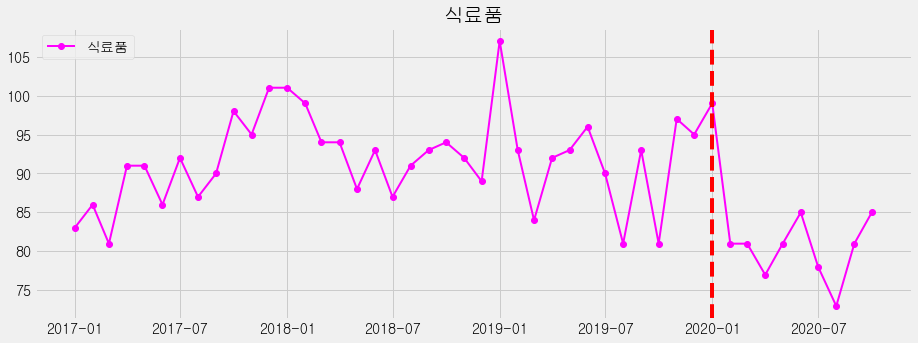

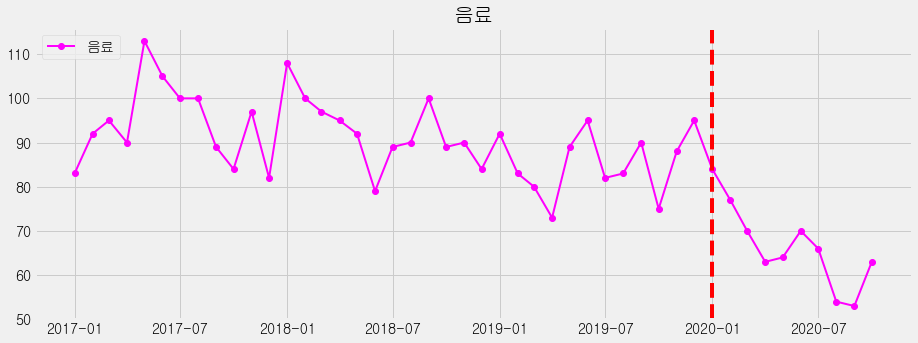

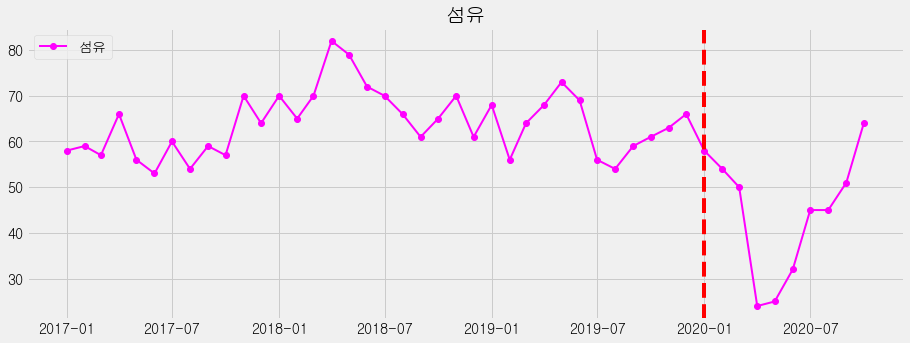

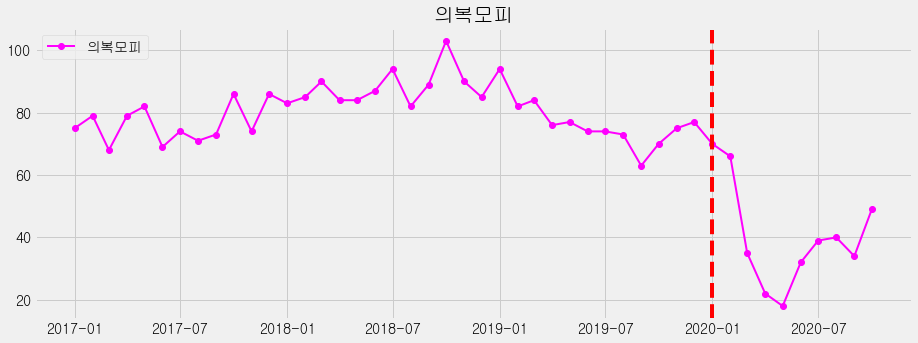

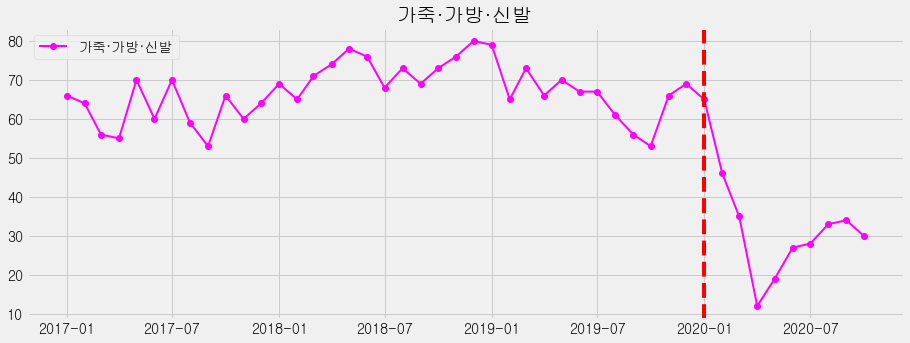

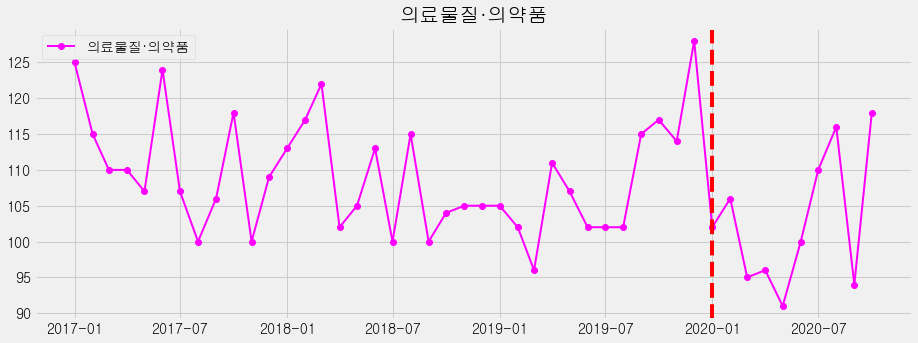

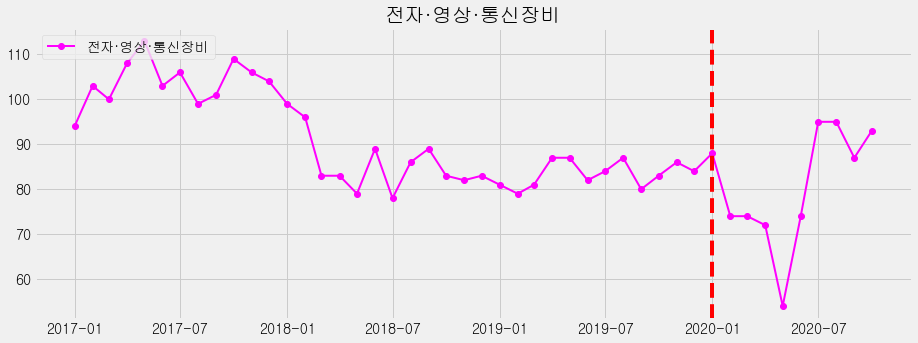

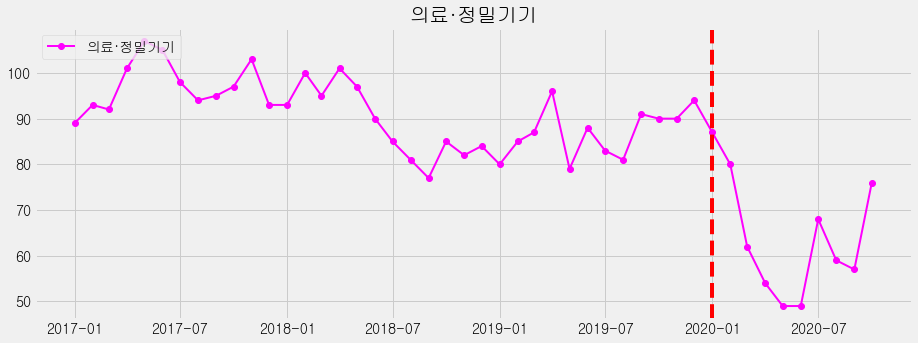

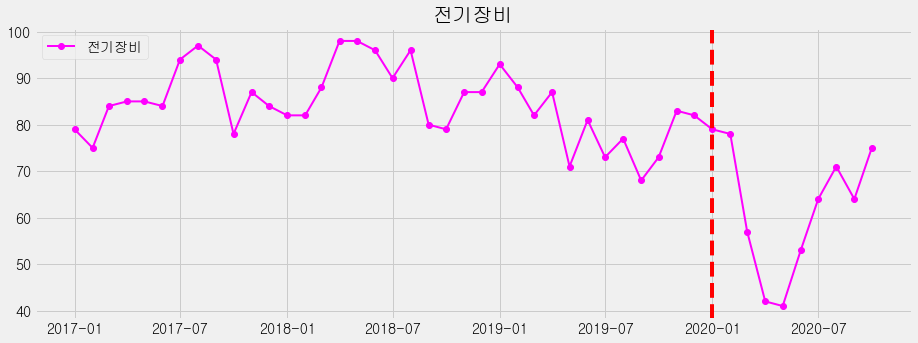

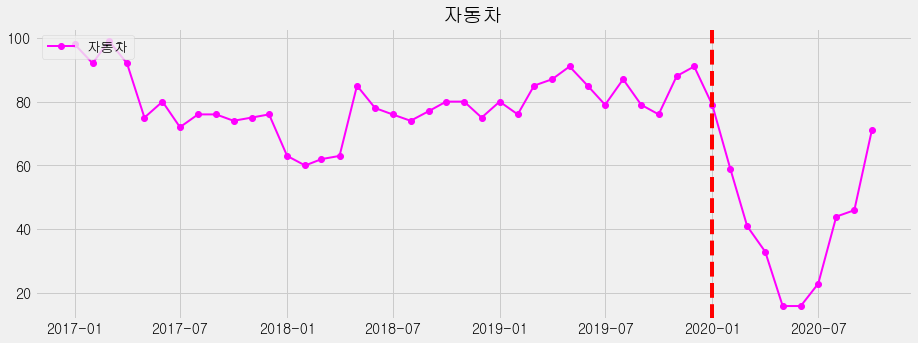

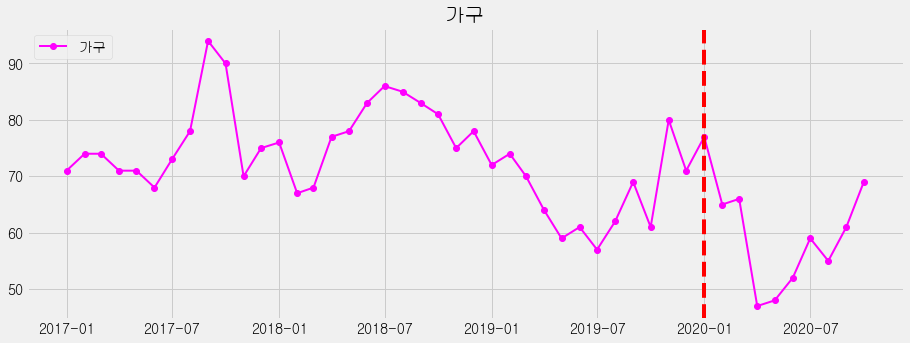

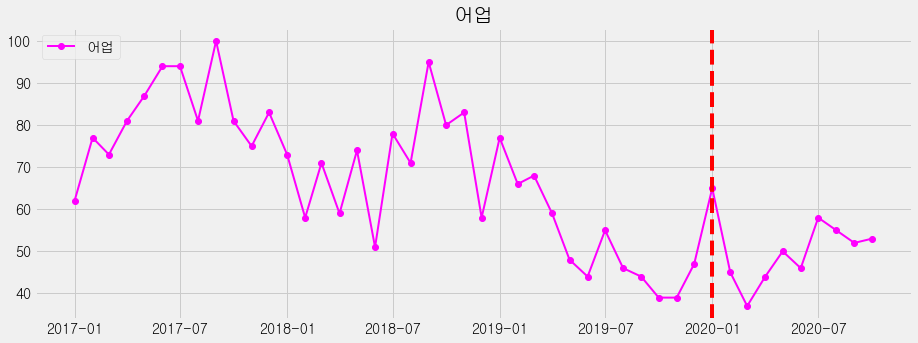

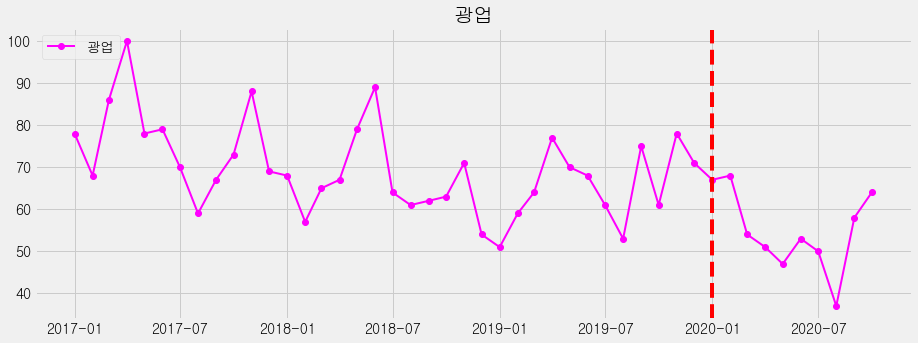

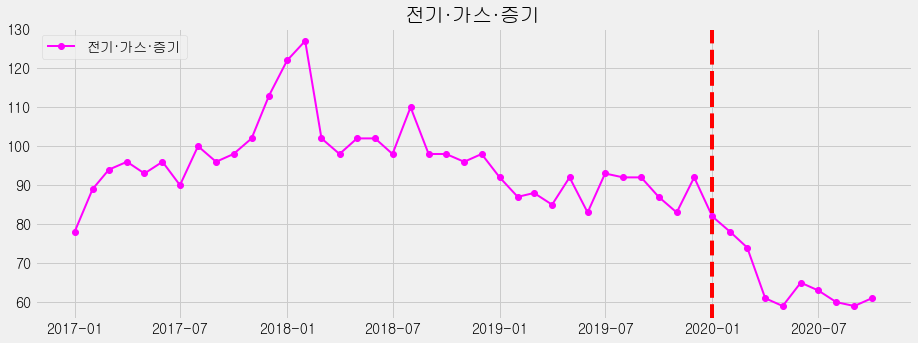

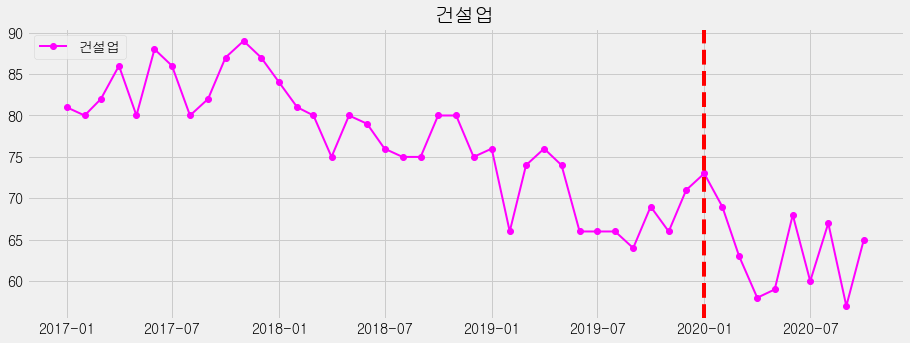

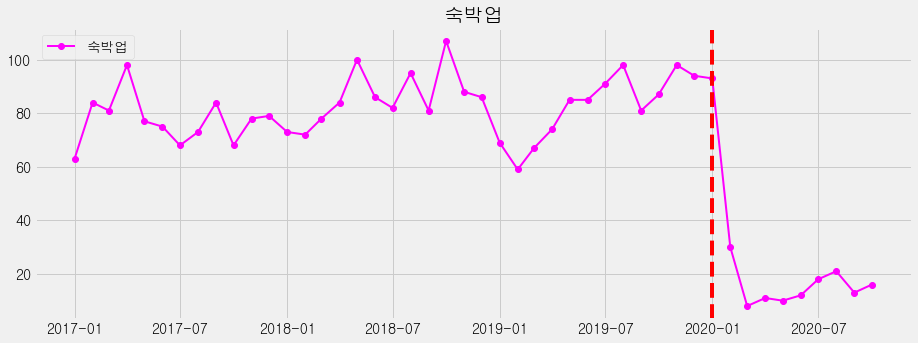

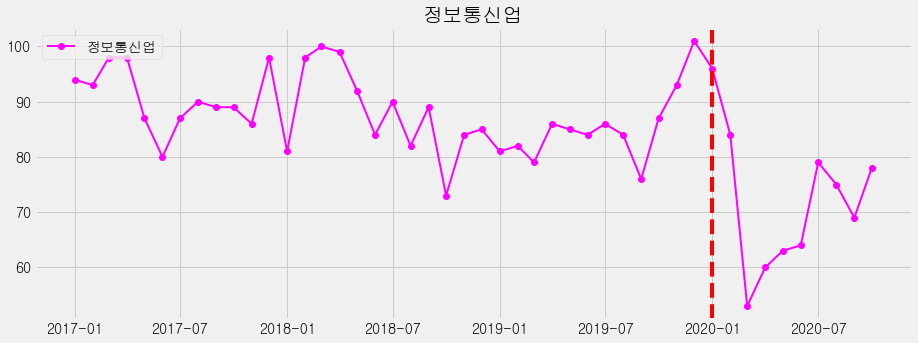

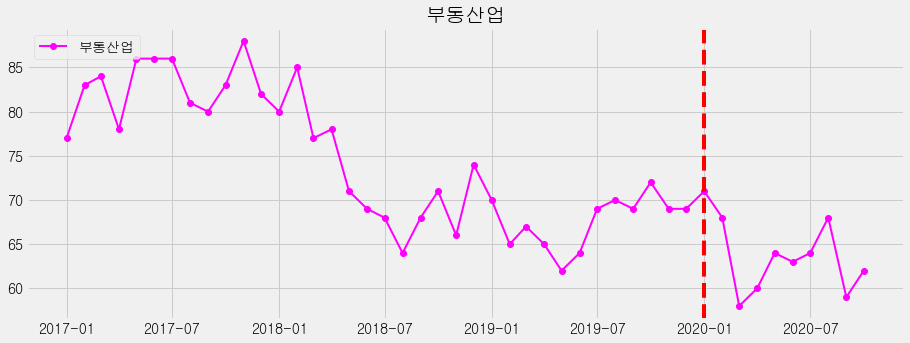

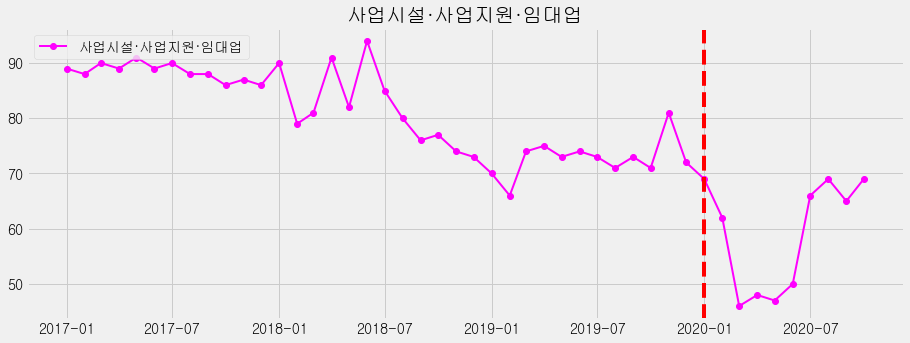

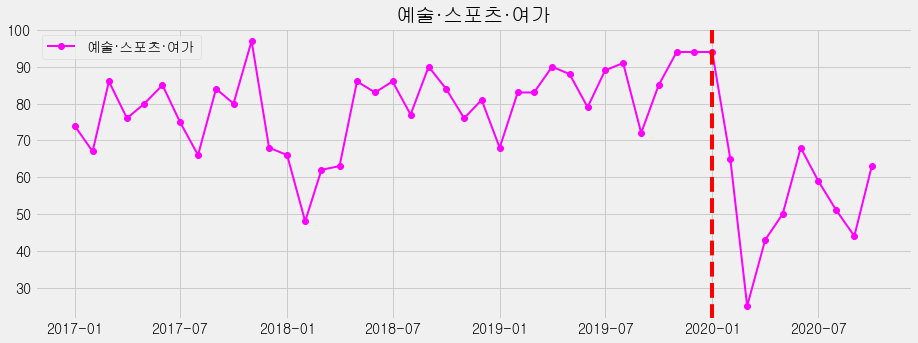

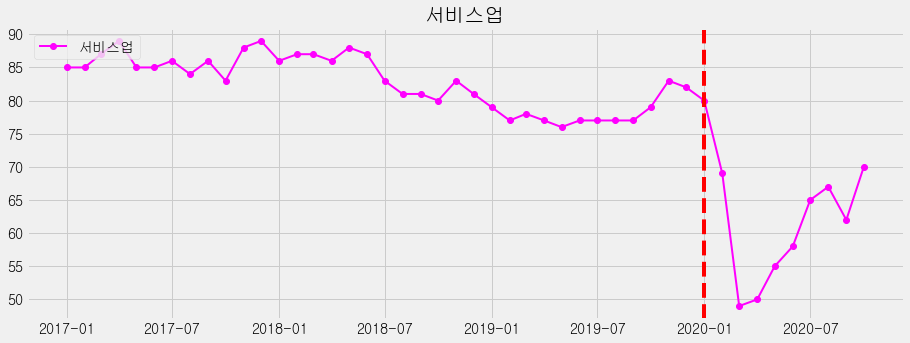

In [32]:
for i in types:
    fig, ax = plt.subplots(1,1,figsize=(14,5))
    ax.plot(np.array(industry[['시점']]),np.array(industry[i]),marker='o', linewidth=2,label=i,color='magenta')
    ax.axvline(x=industry['시점'][36],linestyle ='--',color='red') 
    ax.legend(loc='upper left')
    ax.set_title(i)
    


In [97]:
industry_temp=industry.copy()
industry_temp=industry_temp.diff(12)
industry_temp.drop(columns=['시점']
                ,inplace=True)
industry_temp.dropna(inplace=True)

In [98]:
industry_af=industry_temp.iloc[24:]
industry_bf=industry_temp.iloc[:24]

In [99]:
industry_bf.reset_index(drop=True, inplace=True)

industry_af.reset_index(drop=True, inplace=True)

In [100]:
industry_bf_T=industry_bf.transform(lambda x: (x-x.mean())/x.std()).T
industry_af_T=industry_af.transform(lambda x: (x-x.mean())/x.std()).T

#.transform(lambda x: (x-x.min())/(x.max() - x.min()))

In [149]:
np.random.seed(0)
n_cluster = 7# 하이퍼 파라메터 튜닝 결과 4개의 클러스터가 효율적입니다. 
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=50,random_state=14).fit(industry_bf_T) # 시계열 데이터를 euclidean 기반으로 시계열 클러스터링을 진행합니다.
rlt_tsm = km.predict(industry_bf_T)

my_dict_bf = dict((i, []) for i in range(0, n_cluster))

for i in range(len(rlt_tsm)):
    my_dict_bf[rlt_tsm[i]].append(list(types)[i])

In [150]:
my_dict_bf

{0: ['어업', '건설업'],
 1: ['음료', '전자·영상·통신장비', '의료·정밀기기', '부동산업'],
 2: ['식료품', '섬유', '전기장비', '가구', '숙박업'],
 3: ['자동차', '광업', '예술·스포츠·여가'],
 4: ['의복모피', '가죽·가방·신발'],
 5: ['전기·가스·증기', '정보통신업', '사업시설·사업지원·임대업', '서비스업'],
 6: ['의료물질·의약품']}

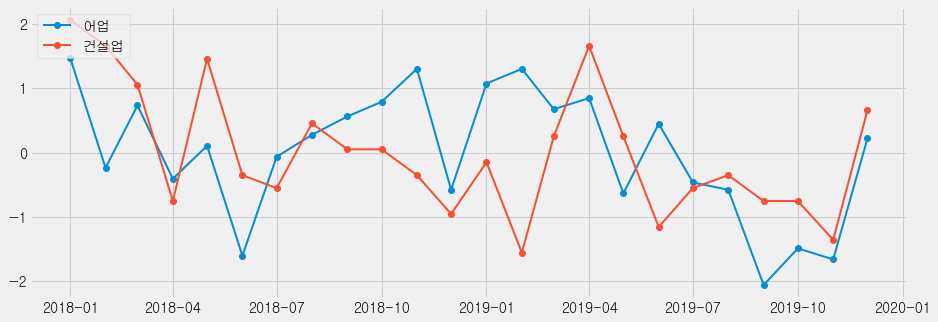

In [151]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[0]:
    ax.plot(np.array(industry[['시점']].iloc[12:36].reset_index(drop=True)),np.array(industry_bf[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

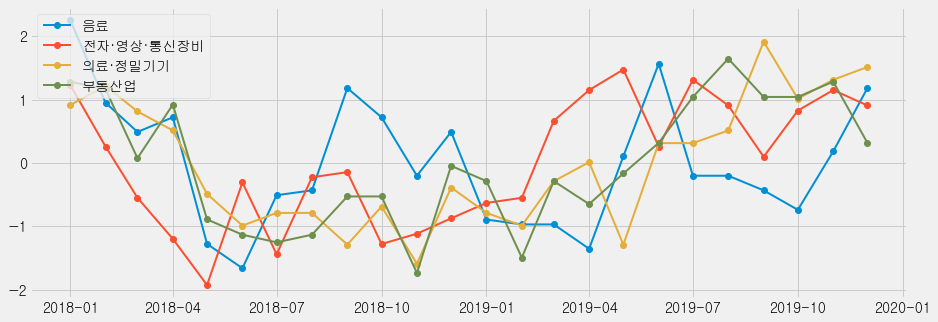

In [152]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[1]:
    ax.plot(np.array(industry[['시점']].iloc[12:36].reset_index(drop=True)),np.array(industry_bf[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

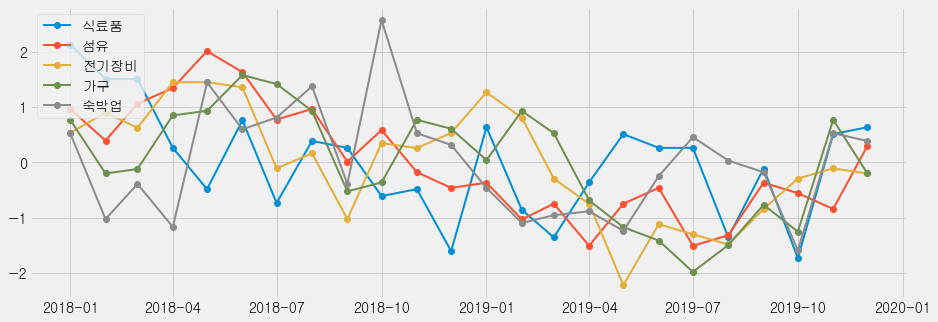

In [153]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[2]:
    ax.plot(np.array(industry[['시점']].iloc[12:36].reset_index(drop=True)),np.array(industry_bf[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

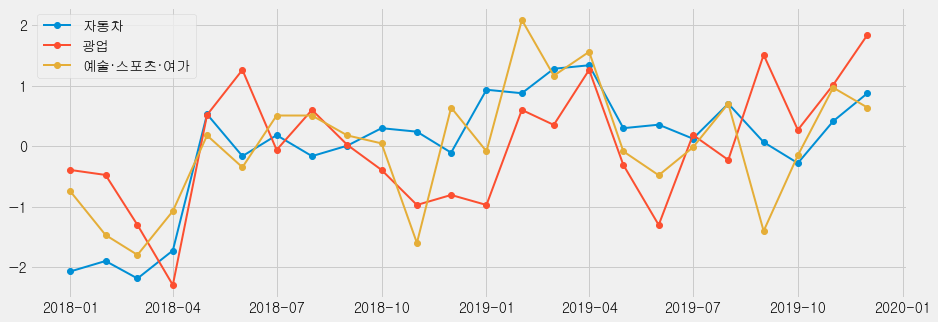

In [154]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[3]:
    ax.plot(np.array(industry[['시점']].iloc[12:36].reset_index(drop=True)),np.array(industry_bf[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

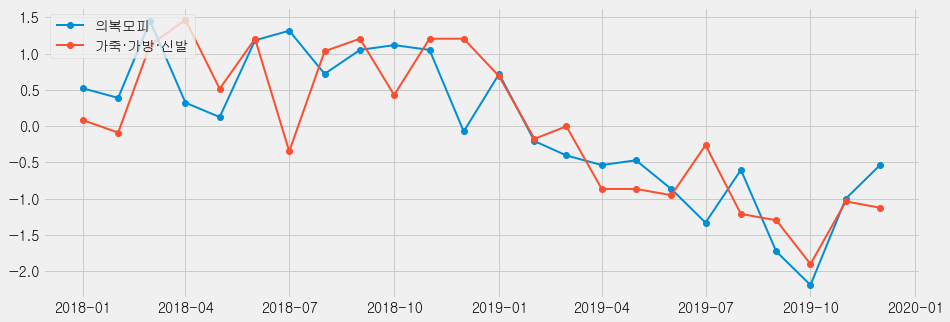

In [155]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[4]:
    ax.plot(np.array(industry[['시점']].iloc[12:36].reset_index(drop=True)),np.array(industry_bf[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

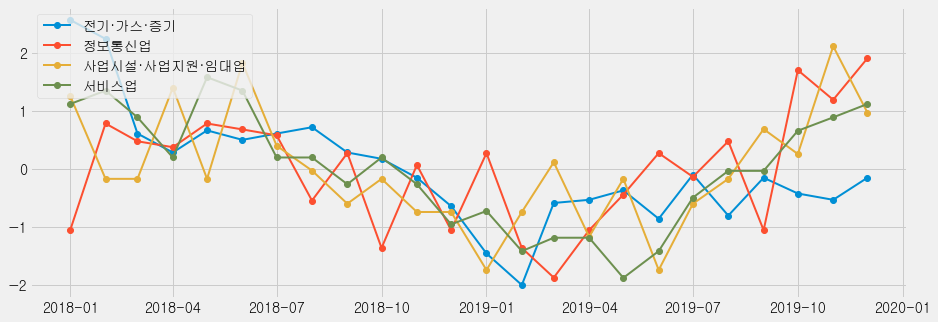

In [156]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[5]:
    ax.plot(np.array(industry[['시점']].iloc[12:36].reset_index(drop=True)),np.array(industry_bf[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

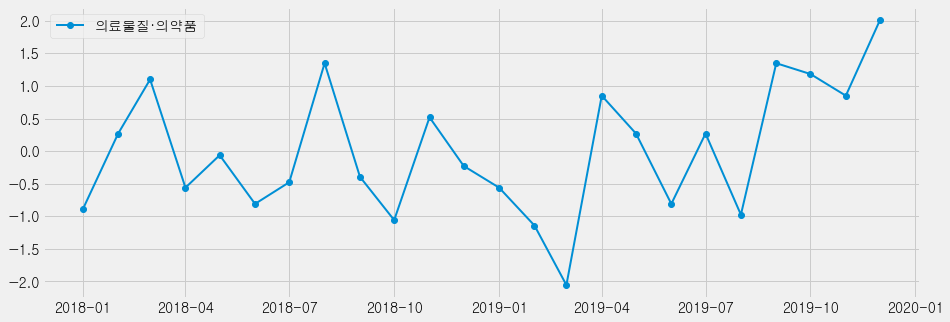

In [169]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[6]:
    ax.plot(np.array(industry[['시점']].iloc[12:36].reset_index(drop=True)),np.array(industry_bf[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

In [160]:
np.random.seed(0)
n_cluster = 7# 하이퍼 파라메터 튜닝 결과 4개의 클러스터가 효율적입니다. 
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=50,random_state=14).fit(industry_af_T) # 시계열 데이터를 euclidean 기반으로 시계열 클러스터링을 진행합니다.
rlt_tsm = km.predict(industry_af_T)

my_dict_af = dict((i, []) for i in range(0, n_cluster))

for i in range(len(rlt_tsm)):
    my_dict_af[rlt_tsm[i]].append(list(types)[i])

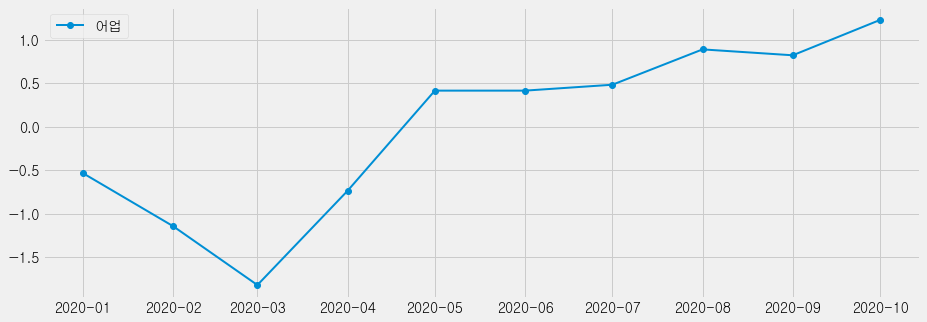

In [162]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[0]:
    ax.plot(np.array(industry[['시점']].iloc[36:].reset_index(drop=True)),np.array(industry_af[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

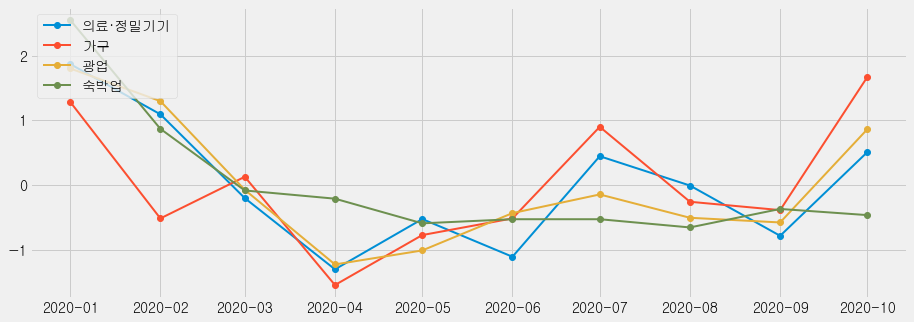

In [163]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[1]:
    ax.plot(np.array(industry[['시점']].iloc[36:].reset_index(drop=True)),np.array(industry_af[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

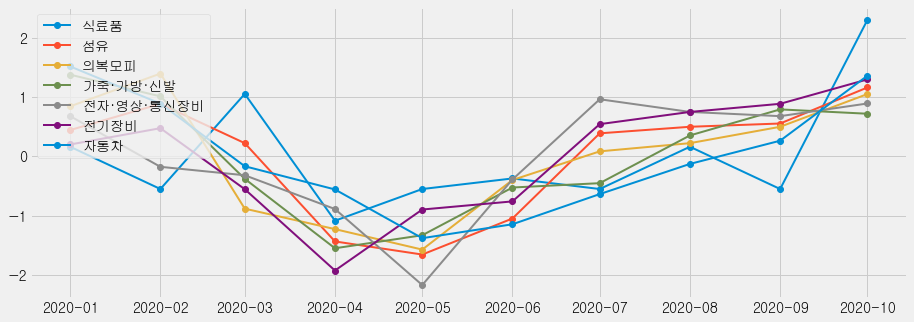

In [164]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[2]:
    ax.plot(np.array(industry[['시점']].iloc[36:].reset_index(drop=True)),np.array(industry_af[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

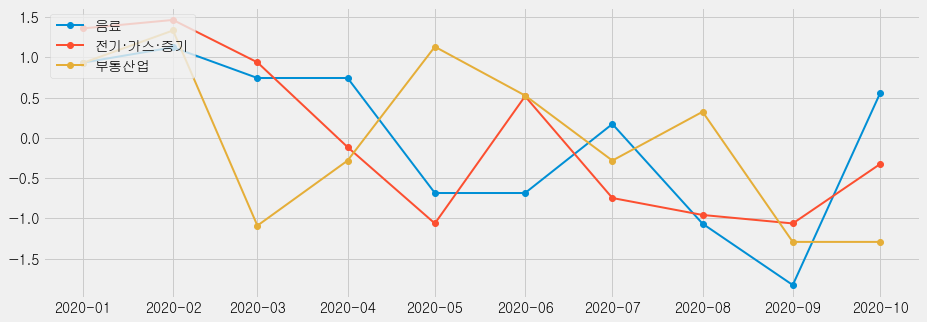

In [165]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[3]:
    ax.plot(np.array(industry[['시점']].iloc[36:].reset_index(drop=True)),np.array(industry_af[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

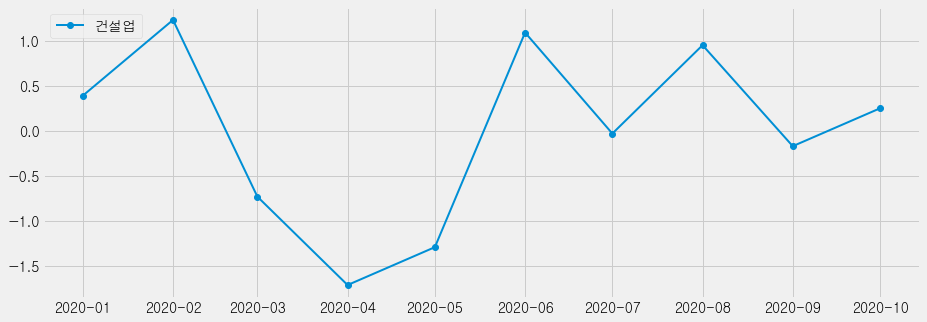

In [166]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[4]:
    ax.plot(np.array(industry[['시점']].iloc[36:].reset_index(drop=True)),np.array(industry_af[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

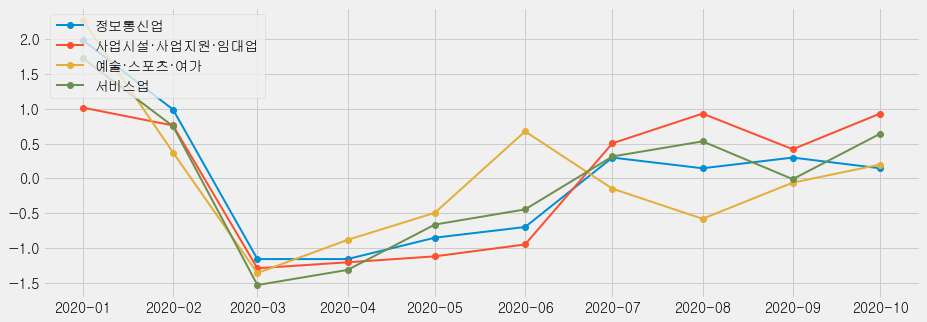

In [167]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[5]:
    ax.plot(np.array(industry[['시점']].iloc[36:].reset_index(drop=True)),np.array(industry_af[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

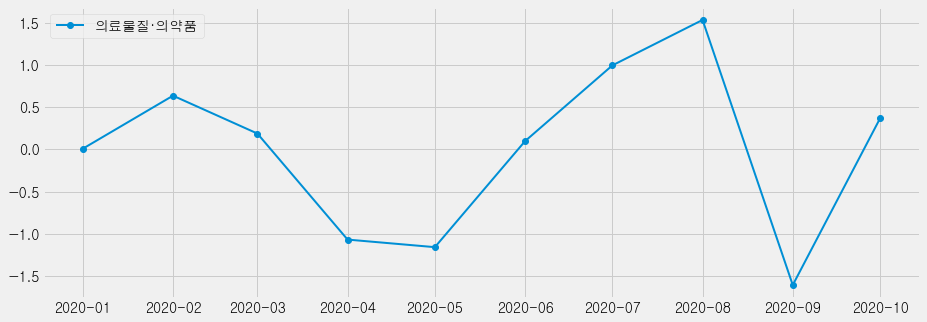

In [168]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[6]:
    ax.plot(np.array(industry[['시점']].iloc[36:].reset_index(drop=True)),np.array(industry_af[[i]].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

In [170]:
my_dict_af

{0: ['어업'],
 1: ['의료·정밀기기', '가구', '광업', '숙박업'],
 2: ['식료품', '섬유', '의복모피', '가죽·가방·신발', '전자·영상·통신장비', '전기장비', '자동차'],
 3: ['음료', '전기·가스·증기', '부동산업'],
 4: ['건설업'],
 5: ['정보통신업', '사업시설·사업지원·임대업', '예술·스포츠·여가', '서비스업'],
 6: ['의료물질·의약품']}

In [171]:
my_dict_bf

{0: ['어업', '건설업'],
 1: ['음료', '전자·영상·통신장비', '의료·정밀기기', '부동산업'],
 2: ['식료품', '섬유', '전기장비', '가구', '숙박업'],
 3: ['자동차', '광업', '예술·스포츠·여가'],
 4: ['의복모피', '가죽·가방·신발'],
 5: ['전기·가스·증기', '정보통신업', '사업시설·사업지원·임대업', '서비스업'],
 6: ['의료물질·의약품']}